In [78]:
import os
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras import models
from keras import layers 
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.tree import DecisionTreeClassifier 

In [80]:
df = pd.read_csv('train.csv')
df.head(10)
df['Family Name'] = (df['Name'].str.split(",", n=1, expand=True))[0]
df['Family Members'] = df['Parch'] + df['SibSp']
df.head(20)
#Might be useful to categorize by family, and no. of family members

#This type of problem is a classification problem: 0-> Dead, 1-> Survived 
#Solutions: 
# a) Decision Tree 
# b) Neural network of densely connected layers - Binary Classification

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Name,Family Members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Nasser,1


In [81]:
data = df 
data['isAlone'] = np.where((data['SibSp']+data['Parch']>0), 0, 1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Name,Family Members,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,0,1


In [82]:
df.info()
#There are supposed to be 891 values for each category 
#Age, and Cabin are missing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             714 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    object 
 12  Family Name     891 non-null    object 
 13  Family Members  891 non-null    int64  
 14  isAlone         891 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(6)
memory usage: 101.1+ KB


In [83]:
df.describe()
#Data description of int/float dtypes 
#Age is missing values, must be filled somehow, b/c important to survival rate 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family Members,isAlone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


In [84]:
df.describe(include = 'O')
#Cabin is missing lots of values (may be dropped in the case that it is not relevant)
#Cabin has lots of duplicate values (passengers shared cabins)
#Tickets should be unique, however there are duplicates 

,Name,Sex,Ticket,Cabin,Embarked,Family Name
count,891,891,891,204,889,891
unique,891,2,681,147,3,667
top,"Lang, Mr. Fang",male,CA. 2343,B96 B98,S,Andersson
freq,1,577,7,4,644,9


In [85]:
#Make some assumptions and visualize data to confirm assumption
# Younger age and women were more likely to survive 
# Higher class tickets are more likely to survive 
#Following cells will show the percentage of people who survived per desired category 

In [86]:
df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [87]:
df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [88]:
df[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [89]:
df[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [90]:
df[['Age', 'Survived']].groupby(['Age']).mean().sort_values(by='Age', ascending=False).head(20)

,Survived
Age,
80.0,1.000
74.0,0.000
71.0,0.000
70.5,0.000
70.0,0.000
66.0,0.000
65.0,0.000
64.0,0.000
63.0,1.000


In [91]:
#Check if families had more chance of survvial  
#People with no family actually survived more than those with families 
df[['Family Members','Family Name', 'Survived']].groupby(['Family Name']).mean().sort_values(by='Survived', ascending = False)

,Family Members,Survived
Family Name,,
Lehmann,0.0,1.0
Glynn,0.0,1.0
Hedman,0.0,1.0
Healy,0.0,1.0
Hays,1.0,1.0
...,...,...
Isham,0.0,0.0
Ilmakangas,1.0,0.0
Ibrahim Shawah,0.0,0.0


In [92]:
#Family members and Family name are quite similar, family name being more unique to a specific sample, 
#therefore will drop family name from data, as well as sibsp/parch because they are combined into family members 

#Compare survival rate based on no of family members - family units with (1-3) people survived significantly more than larger units 
df[['Family Members', 'Survived']].groupby('Family Members').mean().sort_values(by='Survived', ascending=False)

,Survived
Family Members,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


In [93]:
#Visualizing the data
#Histograms are a great tool that provide data within certain ranges 

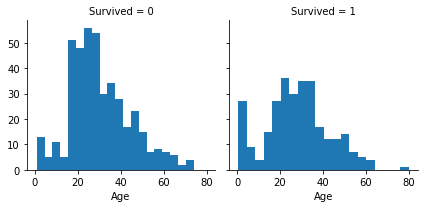

In [94]:
#Plotting Age and Survived 

g = sns.FacetGrid(df, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)

#Age has some sort of correlation with survival 
#Ages b/w 20-60 have the higher mortality  
#Younger ages are more likely to survive 

<AxesSubplot:xlabel='Sex', ylabel='count'>

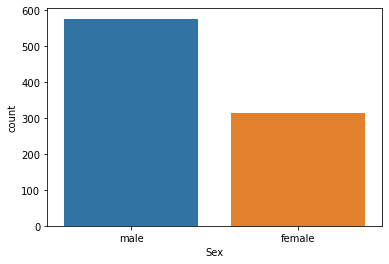

In [95]:
#Comparing no of females to males
#Much more males than females
sns.countplot(x='Sex', data=df)

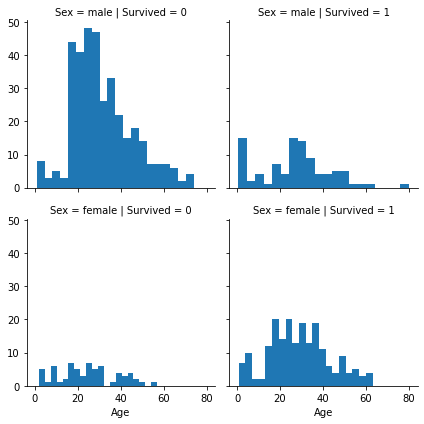

In [96]:
#Visualizing Sex, Age, Survival 

g = sns.FacetGrid(df, col = 'Survived', row = 'Sex')
g.map(plt.hist, 'Age', bins = 20)

#Males survived much less than females 
#Males 16-60 survived much less than females
#Sex has quite the correlation with survival 

In [97]:
#More males than females 
#Men have lower survival despite there being more male passengers in ship 
#Infant and elderly passengers have higher survival 

#Conclusion: 
# - Age is a necessary feature
# - Sex is a necessary feature 

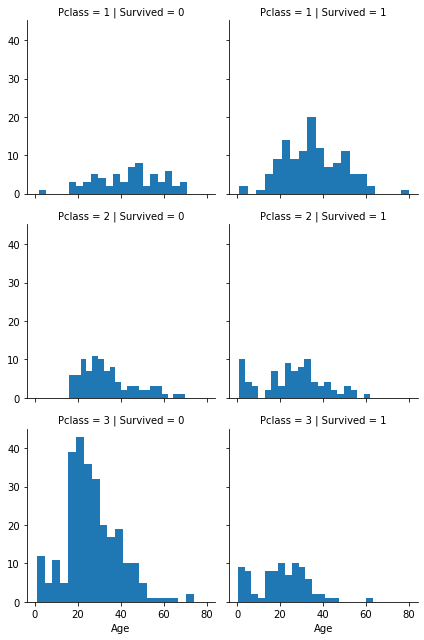

In [98]:
#Visualizing Survival, Age, Pclass 

g = sns.FacetGrid(df, col = 'Survived', row = 'Pclass')
g.map(plt.hist, 'Age', bins = 20)

#Here we can see that class is heavily related to survival 
# Class: 
# 1 - most survival 
# 2,3 have lower amounts of survival 
# PClass is a suitable feature 

C:\Users\saiko\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\saiko\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


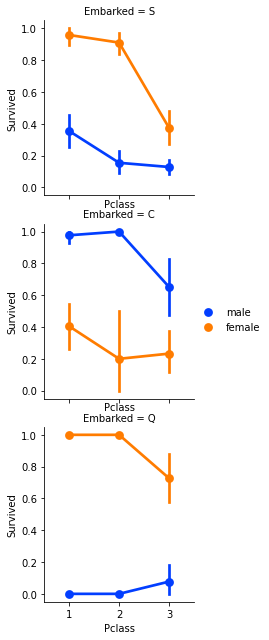

In [99]:
#Check embarked 
g = sns.FacetGrid(df, row = 'Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='bright')
g.add_legend()
g.set(xlabel='Pclass')

In [100]:
#In general all ports show that 1st class passengers have higher rates of survival  
#Create Fare range
#Females have higher survival in all ports except in Port C

In [101]:
#Create titles from names and visualize relationship with survival 
df['Title'] = df['Name'].str.extract('([A-za-z]+)\.')
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

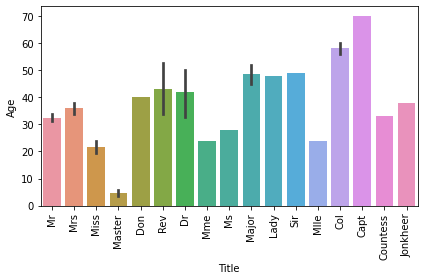

In [102]:
#Plotting the age ranges associated with title
g = sns.barplot(x='Title', y='Age', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
plt.tight_layout()

In [103]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [104]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [105]:
def prepare_data(df): 

    
    #Dict mappings 
    title_mapping = {'Master':0, 'Mr': 1, 'Mrs': 2, 'Miss': 3, 'Rare': 4}
    embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
    sex_mapping = {'female': 0, 'male': 1}
    
    #Creating and Categorizing Title column 
    df['Title'] = df['Name'].str.extract('([A-za-z]+)\.')
    df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)
    df['Title'].replace('Mlle', 'Miss', inplace = True)
    df['Title'].replace('Ms', 'Miss', inplace = True)
    df['Title'].replace('Mme', 'Mrs', inplace = True)
    df['Title'].replace(title_mapping, inplace = True)
    
    #Sex mapping 
    df['Sex'].replace(sex_mapping, inplace=True)
    
    #Creating isALone 
    # 0 if they are not alone
    # 1 if they are alone 
    df['isAlone'] = np.where(((df['SibSp']+df['Parch'])>0), 0, 1)
    
    df = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age', 'SibSp', 'Parch'])
    df = df.dropna(axis=0)
    
    #Categorizing Embarked 
    df['Embarked'].replace(embarked_mapping, inplace = True)
    
    #Adjusting Pclass 
    df['Pclass'] = df['Pclass'] - 1
    
    return df

In [106]:
def prepare_data2(df): 

    
    #Dict mappings 
    title_mapping = {'Master':0, 'Mr': 1, 'Mrs': 2, 'Miss': 3, 'Rare': 4}
    embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
    sex_mapping = {'female': 0, 'male': 1}
    
    #Creating and Categorizing Title column 
    df['Title'] = df['Name'].str.extract('([A-za-z]+)\.')
    df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)
    df['Title'].replace('Mlle', 'Miss', inplace = True)
    df['Title'].replace('Ms', 'Miss', inplace = True)
    df['Title'].replace('Mme', 'Mrs', inplace = True)
    df['Title'].replace(title_mapping, inplace = True)
    
    #Sex mapping 
    df['Sex'].replace(sex_mapping, inplace=True)
    
    #Creating isALone 
    # 0 if they are not alone
    # 1 if they are alone 
    df['isAlone'] = np.where(((df['SibSp']+df['Parch'])>0), 0, 1)
    
    df = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age', 'SibSp', 'Parch'])
    
    #Categorizing Embarked 
    df['Embarked'].replace(embarked_mapping, inplace = True)
    
    #Adjusting Pclass 
    df['Pclass'] = df['Pclass'] - 1
    
    return df

In [107]:
test_data = pd.read_csv('test.csv')
passenger_id = test_data['PassengerId']
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
test_data = prepare_data2(test_data)
test_data.isna().sum()

Pclass      0
Sex         0
Fare        0
Embarked    0
Title       0
isAlone     0
dtype: int64

In [108]:
dt = prepare_data(data)

In [109]:
dt
train_labels = dt['Survived']
train_data = dt.drop(columns = ['Survived'])

In [110]:
def get_model(num_nodes=16, dropout=0.2): 
    model = models.Sequential()
    model.add(layers.Dense(num_nodes, activation = 'relu', input_shape=(6,)))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(num_nodes, activation='relu'))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(num_nodes, activation= 'relu'))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(
                optimizer = 'adam', 
                loss = 'binary_crossentropy', 
                metrics = ['acc'])
    
    return model

In [111]:
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels)

In [112]:
model = get_model()

In [113]:
history1 = model.fit(x_train, y_train, epochs = 50, batch_size = 1, validation_data = (x_val, y_val))

Epoch 1/50
666/666 [==============================] - 1s 1ms/step - loss: 1.1802 - acc: 0.5224 - val_loss: 0.6347 - val_acc: 0.6771
Epoch 2/50
666/666 [==============================] - 1s 814us/step - loss: 1.0613 - acc: 0.5646 - val_loss: 0.6162 - val_acc: 0.6996
Epoch 3/50
666/666 [==============================] - 0s 725us/step - loss: 0.6837 - acc: 0.6941 - val_loss: 0.6155 - val_acc: 0.7040
Epoch 4/50
666/666 [==============================] - 1s 777us/step - loss: 0.7346 - acc: 0.6437 - val_loss: 0.6156 - val_acc: 0.6816
Epoch 5/50
666/666 [==============================] - 1s 754us/step - loss: 0.7168 - acc: 0.6577 - val_loss: 0.6566 - val_acc: 0.6143
Epoch 6/50
666/666 [==============================] - 1s 757us/step - loss: 0.6892 - acc: 0.6386 - val_loss: 0.6247 - val_acc: 0.6368
Epoch 7/50
666/666 [==============================] - 1s 752us/step - loss: 0.6443 - acc: 0.6676 - val_loss: 0.5852 - val_acc: 0.6861
Epoch 8/50
666/666 [==============================] - 0s 748us/s

In [114]:
model = get_model()
history2 = model.fit(x_train, y_train, epochs = 50, batch_size = 10, validation_data = (x_val, y_val))

Epoch 1/50
67/67 [==============================] - 1s 4ms/step - loss: 1.6025 - acc: 0.4611 - val_loss: 0.6781 - val_acc: 0.6368
Epoch 2/50
67/67 [==============================] - 0s 1ms/step - loss: 1.3961 - acc: 0.4960 - val_loss: 0.6776 - val_acc: 0.6682
Epoch 3/50
67/67 [==============================] - 0s 1ms/step - loss: 0.8494 - acc: 0.5634 - val_loss: 0.6368 - val_acc: 0.6726
Epoch 4/50
67/67 [==============================] - 0s 2ms/step - loss: 0.8631 - acc: 0.6212 - val_loss: 0.6246 - val_acc: 0.7040
Epoch 5/50
67/67 [==============================] - 0s 1ms/step - loss: 0.8245 - acc: 0.6167 - val_loss: 0.6155 - val_acc: 0.7085
Epoch 6/50
67/67 [==============================] - 0s 1ms/step - loss: 0.6692 - acc: 0.6410 - val_loss: 0.6054 - val_acc: 0.7130
Epoch 7/50
67/67 [==============================] - 0s 1ms/step - loss: 0.7277 - acc: 0.6157 - val_loss: 0.5986 - val_acc: 0.6906
Epoch 8/50
67/67 [==============================] - 0s 1ms/step - loss: 0.6742 - acc: 0.66

In [115]:
model = get_model()
history3 = model.fit(x_train, y_train, epochs = 50, batch_size = 20, validation_data = (x_val, y_val))

Epoch 1/50
34/34 [==============================] - 1s 6ms/step - loss: 2.0716 - acc: 0.5593 - val_loss: 0.6799 - val_acc: 0.6233
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 1.3459 - acc: 0.4588 - val_loss: 0.6774 - val_acc: 0.6368
Epoch 3/50
34/34 [==============================] - 0s 1ms/step - loss: 1.2919 - acc: 0.5223 - val_loss: 0.6751 - val_acc: 0.6457
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 0.9430 - acc: 0.5608 - val_loss: 0.6506 - val_acc: 0.6906
Epoch 5/50
34/34 [==============================] - 0s 1ms/step - loss: 1.0359 - acc: 0.5497 - val_loss: 0.6390 - val_acc: 0.6726
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 0.8136 - acc: 0.5842 - val_loss: 0.6321 - val_acc: 0.6726
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 0.7467 - acc: 0.6055 - val_loss: 0.6234 - val_acc: 0.6816
Epoch 8/50
34/34 [==============================] - 0s 2ms/step - loss: 0.7675 - acc: 0.62

In [116]:
model = get_model(num_nodes=32, dropout = 0.5)
history4 = model.fit(x_train, y_train, epochs = 50, batch_size = 1, validation_data = (x_val, y_val))

Epoch 1/50
666/666 [==============================] - 1s 952us/step - loss: 2.8826 - acc: 0.5212 - val_loss: 0.7699 - val_acc: 0.6143
Epoch 2/50
666/666 [==============================] - 0s 734us/step - loss: 2.0815 - acc: 0.5139 - val_loss: 0.6442 - val_acc: 0.6726
Epoch 3/50
666/666 [==============================] - 0s 694us/step - loss: 1.1641 - acc: 0.6063 - val_loss: 0.6203 - val_acc: 0.6951
Epoch 4/50
666/666 [==============================] - 0s 678us/step - loss: 0.8698 - acc: 0.6298 - val_loss: 0.6657 - val_acc: 0.6143
Epoch 5/50
666/666 [==============================] - 0s 682us/step - loss: 0.7358 - acc: 0.6256 - val_loss: 0.6432 - val_acc: 0.6143
Epoch 6/50
666/666 [==============================] - 0s 681us/step - loss: 0.7137 - acc: 0.6498 - val_loss: 0.6536 - val_acc: 0.6143
Epoch 7/50
666/666 [==============================] - 0s 704us/step - loss: 0.7842 - acc: 0.5956 - val_loss: 0.6473 - val_acc: 0.6143
Epoch 8/50
666/666 [==============================] - 0s 693us

In [117]:
model = get_model(num_nodes=32, dropout=0.5)
history5 = model.fit(x_train, y_train, epochs = 50, batch_size = 10, validation_data = (x_val, y_val))

Epoch 1/50
67/67 [==============================] - 1s 8ms/step - loss: 4.0249 - acc: 0.4836 - val_loss: 0.8797 - val_acc: 0.6143
Epoch 2/50
67/67 [==============================] - 0s 1ms/step - loss: 2.2215 - acc: 0.4636 - val_loss: 0.7146 - val_acc: 0.6143
Epoch 3/50
67/67 [==============================] - 0s 1ms/step - loss: 1.7073 - acc: 0.5087 - val_loss: 0.6502 - val_acc: 0.6861
Epoch 4/50
67/67 [==============================] - 0s 1ms/step - loss: 1.2659 - acc: 0.5650 - val_loss: 0.6471 - val_acc: 0.6861
Epoch 5/50
67/67 [==============================] - 0s 1ms/step - loss: 1.1432 - acc: 0.5780 - val_loss: 0.6486 - val_acc: 0.6547
Epoch 6/50
67/67 [==============================] - 0s 1ms/step - loss: 1.1465 - acc: 0.5780 - val_loss: 0.6383 - val_acc: 0.7085
Epoch 7/50
67/67 [==============================] - 0s 1ms/step - loss: 0.8903 - acc: 0.6183 - val_loss: 0.6458 - val_acc: 0.6726
Epoch 8/50
67/67 [==============================] - 0s 1ms/step - loss: 0.9080 - acc: 0.62

In [118]:
model = get_model(num_nodes=32, dropout=0.5)
history6 = model.fit(x_train, y_train, epochs = 50, batch_size = 20, validation_data = (x_val, y_val))

Epoch 1/50
34/34 [==============================] - 1s 6ms/step - loss: 3.1328 - acc: 0.4613 - val_loss: 0.6552 - val_acc: 0.6861
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 2.9900 - acc: 0.4458 - val_loss: 0.7045 - val_acc: 0.6143
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 1.6855 - acc: 0.5266 - val_loss: 0.8421 - val_acc: 0.6143
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 1.7508 - acc: 0.5254 - val_loss: 0.7619 - val_acc: 0.6143
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 1.2857 - acc: 0.5268 - val_loss: 0.6930 - val_acc: 0.6143
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 1.4639 - acc: 0.5683 - val_loss: 0.6915 - val_acc: 0.6143
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 1.2118 - acc: 0.5429 - val_loss: 0.6951 - val_acc: 0.6143
Epoch 8/50
34/34 [==============================] - 0s 2ms/step - loss: 1.2751 - acc: 0.53

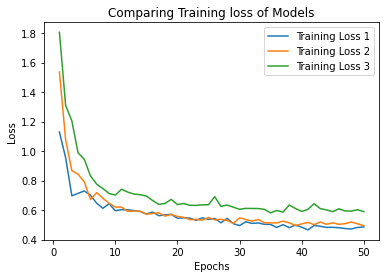

In [119]:
epochs = range(1,51)
plt.plot(epochs, history1.history['loss'], label = 'Training Loss 1')
plt.plot(epochs, history2.history['loss'], label = 'Training Loss 2')
plt.plot(epochs, history3.history['loss'], label = 'Training Loss 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Training loss of Models')
plt.legend()
#Training loss of model 1 is much lower than the rest 

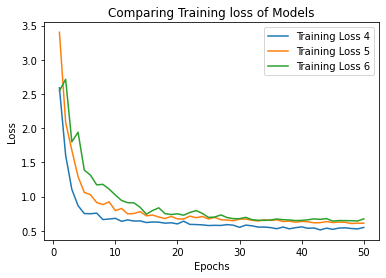

In [120]:
epochs = range(1,51)
plt.plot(epochs, history4.history['loss'], label = 'Training Loss 4')
plt.plot(epochs, history5.history['loss'], label = 'Training Loss 5')
plt.plot(epochs, history6.history['loss'], label = 'Training Loss 6')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Training loss of Models')
plt.legend()
#Training model 4 is better than rest 

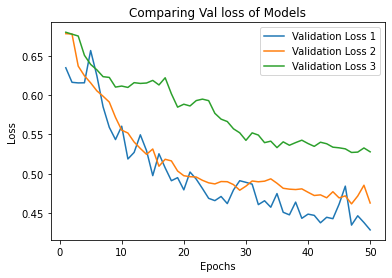

In [121]:
epochs = range(1,51)
plt.plot(epochs, history1.history['val_loss'], label = 'Validation Loss 1')
plt.plot(epochs, history2.history['val_loss'], label = 'Validation Loss 2')
plt.plot(epochs, history3.history['val_loss'], label = 'Validation Loss 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Val loss of Models')
plt.legend()
#Model 1 proves to be better 

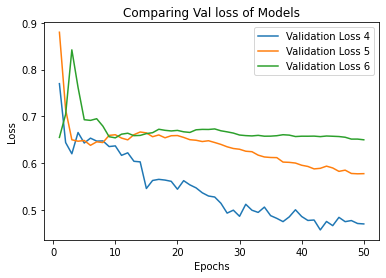

In [122]:
plt.plot(epochs, history4.history['val_loss'], label = 'Validation Loss 4')
plt.plot(epochs, history5.history['val_loss'], label = 'Validation Loss 5')
plt.plot(epochs, history6.history['val_loss'], label = 'Validation Loss 6')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Val loss of Models')
plt.legend()
#Model 4 is best 

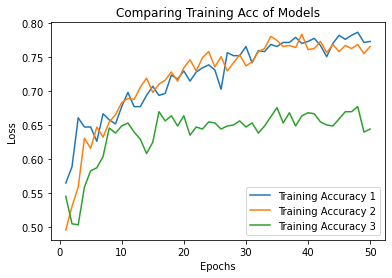

In [123]:
plt.plot(epochs, history1.history['acc'], label = 'Training Accuracy 1')
plt.plot(epochs, history2.history['acc'], label = 'Training Accuracy 2')
plt.plot(epochs, history3.history['acc'], label = 'Training Accuracy 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Training Acc of Models')
plt.legend()
#Model 1 performs much better than the rest however clear signs of overfitting 

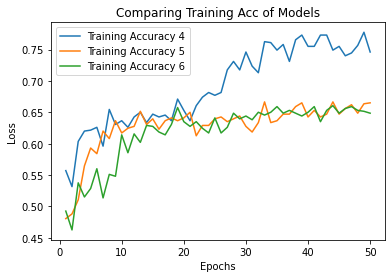

In [124]:
plt.plot(epochs, history4.history['acc'], label = 'Training Accuracy 4')
plt.plot(epochs, history5.history['acc'], label = 'Training Accuracy 5')
plt.plot(epochs, history6.history['acc'], label = 'Training Accuracy 6')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Training Acc of Models')
plt.legend()
#Model 4 is best but also has signs of overfitting 

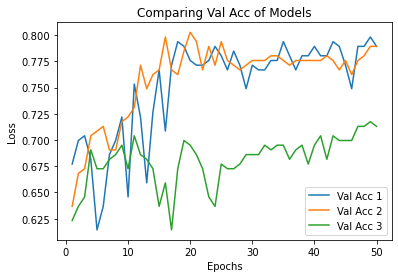

In [125]:
epochs = range(1,51)
plt.plot(epochs, history1.history['val_acc'], label = 'Val Acc 1')
plt.plot(epochs, history2.history['val_acc'], label = 'Val Acc 2')
plt.plot(epochs, history3.history['val_acc'], label = 'Val Acc 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Val Acc of Models')
plt.legend()
#Model 1 is best 

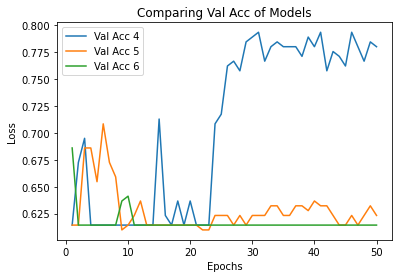

In [126]:
plt.plot(epochs, history4.history['val_acc'], label = 'Val Acc 4')
plt.plot(epochs, history5.history['val_acc'], label = 'Val Acc 5')
plt.plot(epochs, history6.history['val_acc'], label = 'Val Acc 6')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Val Acc of Models')
plt.legend()
#Model 4 is best 

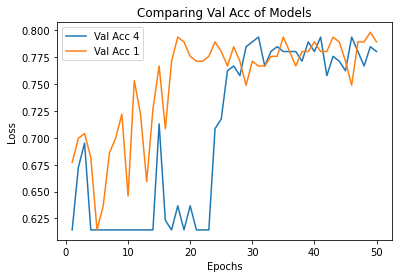

In [127]:
plt.plot(epochs, history4.history['val_acc'], label = 'Val Acc 4')
plt.plot(epochs, history1.history['val_acc'], label = 'Val Acc 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Val Acc of Models')
plt.legend()
#Model 1 performs better than model 4 

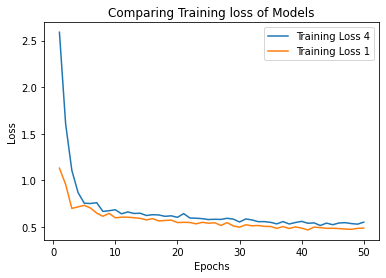

In [128]:
epochs = range(1,51)
plt.plot(epochs, history4.history['loss'], label = 'Training Loss 4')
plt.plot(epochs, history1.history['loss'], label = 'Training Loss 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Training loss of Models')
plt.legend()
#Model 1 has lower loss

In [129]:
#Will swap dropout rates for model 1 and 4 to see which dropout rate is better

In [130]:
model = get_model(dropout = 0.5)
history1_v2 = model.fit(x_train, y_train, epochs = 50, batch_size = 1, validation_data = (x_val, y_val))

Epoch 1/50
666/666 [==============================] - 1s 877us/step - loss: 1.8897 - acc: 0.5116 - val_loss: 0.6682 - val_acc: 0.6682
Epoch 2/50
666/666 [==============================] - 0s 682us/step - loss: 1.4437 - acc: 0.5863 - val_loss: 0.6453 - val_acc: 0.6816
Epoch 3/50
666/666 [==============================] - 0s 665us/step - loss: 0.9714 - acc: 0.6077 - val_loss: 0.6463 - val_acc: 0.6592
Epoch 4/50
666/666 [==============================] - 0s 677us/step - loss: 0.8251 - acc: 0.6412 - val_loss: 0.6541 - val_acc: 0.6099
Epoch 5/50
666/666 [==============================] - 0s 677us/step - loss: 0.7707 - acc: 0.6023 - val_loss: 0.6567 - val_acc: 0.6143
Epoch 6/50
666/666 [==============================] - 1s 790us/step - loss: 0.6496 - acc: 0.6850 - val_loss: 0.6510 - val_acc: 0.6143
Epoch 7/50
666/666 [==============================] - 0s 657us/step - loss: 0.7159 - acc: 0.6332 - val_loss: 0.6477 - val_acc: 0.6143
Epoch 8/50
666/666 [==============================] - 0s 637us

In [131]:
model = get_model(dropout = 0.35)
history1_v3 = model.fit(x_train, y_train, epochs = 50, batch_size = 1, validation_data = (x_val, y_val))

Epoch 1/50
666/666 [==============================] - 1s 915us/step - loss: 1.5704 - acc: 0.5540 - val_loss: 0.6608 - val_acc: 0.6771
Epoch 2/50
666/666 [==============================] - 0s 740us/step - loss: 0.8547 - acc: 0.5738 - val_loss: 0.6429 - val_acc: 0.7085
Epoch 3/50
666/666 [==============================] - 0s 750us/step - loss: 0.7467 - acc: 0.6183 - val_loss: 0.6521 - val_acc: 0.6233
Epoch 4/50
666/666 [==============================] - 1s 752us/step - loss: 0.6724 - acc: 0.6596 - val_loss: 0.6323 - val_acc: 0.6502
Epoch 5/50
666/666 [==============================] - 1s 758us/step - loss: 0.6898 - acc: 0.6289 - val_loss: 0.6141 - val_acc: 0.6771
Epoch 6/50
666/666 [==============================] - 0s 746us/step - loss: 0.6616 - acc: 0.6657 - val_loss: 0.6243 - val_acc: 0.6368
Epoch 7/50
666/666 [==============================] - 1s 769us/step - loss: 0.6436 - acc: 0.6561 - val_loss: 0.6245 - val_acc: 0.6233
Epoch 8/50
666/666 [==============================] - 1s 761us

In [132]:
model = get_model(num_nodes = 32, dropout = 0.2)
history4_v2 = model.fit(x_train, y_train, epochs = 50, batch_size = 1, validation_data = (x_val, y_val))

Epoch 1/50
666/666 [==============================] - 1s 1ms/step - loss: 1.3203 - acc: 0.4977 - val_loss: 0.6864 - val_acc: 0.6726
Epoch 2/50
666/666 [==============================] - 1s 874us/step - loss: 0.7550 - acc: 0.6268 - val_loss: 0.5805 - val_acc: 0.7085
Epoch 3/50
666/666 [==============================] - 1s 940us/step - loss: 0.6884 - acc: 0.6306 - val_loss: 0.6019 - val_acc: 0.6906
Epoch 4/50
666/666 [==============================] - 1s 906us/step - loss: 0.6724 - acc: 0.6595 - val_loss: 0.5495 - val_acc: 0.6906
Epoch 5/50
666/666 [==============================] - 1s 894us/step - loss: 0.6308 - acc: 0.6534 - val_loss: 0.5379 - val_acc: 0.6906
Epoch 6/50
666/666 [==============================] - 1s 963us/step - loss: 0.5897 - acc: 0.6841 - val_loss: 0.5308 - val_acc: 0.6906
Epoch 7/50
666/666 [==============================] - 1s 935us/step - loss: 0.5626 - acc: 0.7088 - val_loss: 0.5393 - val_acc: 0.7309
Epoch 8/50
666/666 [==============================] - 1s 906us/s

In [133]:
model = get_model(num_nodes = 32, dropout = 0.35)
history4_v3 = model.fit(x_train, y_train, epochs = 50, batch_size = 1, validation_data = (x_val, y_val))

Epoch 1/50
666/666 [==============================] - 1s 1ms/step - loss: 1.2642 - acc: 0.5097 - val_loss: 0.6903 - val_acc: 0.6143
Epoch 2/50
666/666 [==============================] - 1s 833us/step - loss: 0.8336 - acc: 0.6470 - val_loss: 0.6055 - val_acc: 0.7085
Epoch 3/50
666/666 [==============================] - 1s 864us/step - loss: 0.7512 - acc: 0.6419 - val_loss: 0.6081 - val_acc: 0.6143
Epoch 4/50
666/666 [==============================] - 1s 858us/step - loss: 0.6637 - acc: 0.6416 - val_loss: 0.5896 - val_acc: 0.6996
Epoch 5/50
666/666 [==============================] - 1s 824us/step - loss: 0.7155 - acc: 0.6238 - val_loss: 0.5922 - val_acc: 0.6143
Epoch 6/50
666/666 [==============================] - 1s 858us/step - loss: 0.6475 - acc: 0.6308 - val_loss: 0.5813 - val_acc: 0.6143
Epoch 7/50
666/666 [==============================] - 1s 859us/step - loss: 0.6280 - acc: 0.6152 - val_loss: 0.5447 - val_acc: 0.6771
Epoch 8/50
666/666 [==============================] - 1s 852us/s

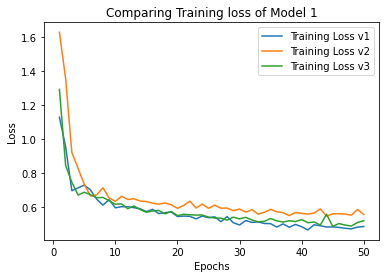

In [134]:
epochs = range(1,51)
plt.plot(epochs, history1.history['loss'], label = 'Training Loss v1')
plt.plot(epochs, history1_v2.history['loss'], label = 'Training Loss v2')
plt.plot(epochs, history1_v3.history['loss'], label = 'Training Loss v3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Training loss of Model 1')
plt.legend()
#v1 has the lowest loss function 

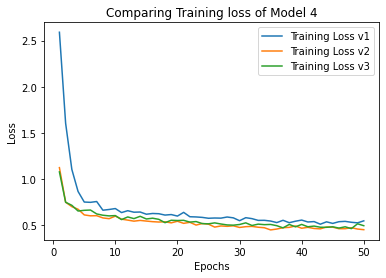

In [135]:
epochs = range(1,51)
plt.plot(epochs, history4.history['loss'], label = 'Training Loss v1')
plt.plot(epochs, history4_v2.history['loss'], label = 'Training Loss v2')
plt.plot(epochs, history4_v3.history['loss'], label = 'Training Loss v3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Training loss of Model 4')
plt.legend()
#v2 has best loss 

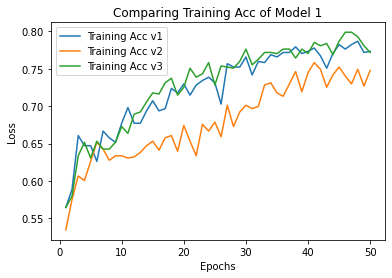

In [136]:
epochs = range(1,51)
plt.plot(epochs, history1.history['acc'], label = 'Training Acc v1')
plt.plot(epochs, history1_v2.history['acc'], label = 'Training Acc v2')
plt.plot(epochs, history1_v3.history['acc'], label = 'Training Acc v3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Training Acc of Model 1')
plt.legend()
#v3 performs best on training data 

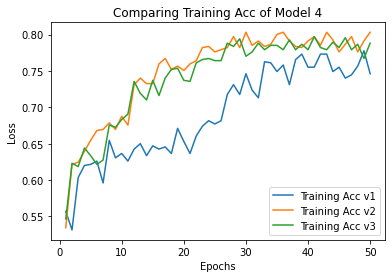

In [137]:
epochs = range(1,51)
plt.plot(epochs, history4.history['acc'], label = 'Training Acc v1')
plt.plot(epochs, history4_v2.history['acc'], label = 'Training Acc v2')
plt.plot(epochs, history4_v3.history['acc'], label = 'Training Acc v3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Training Acc of Model 4')
plt.legend()
#v2 has best performance on training data 

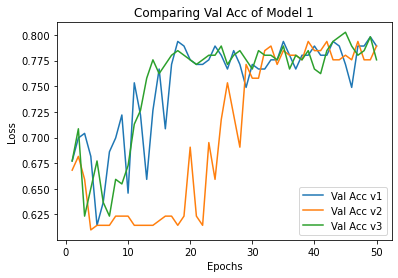

In [138]:
epochs = range(1,51)
plt.plot(epochs, history1.history['val_acc'], label = 'Val Acc v1')
plt.plot(epochs, history1_v2.history['val_acc'], label = 'Val Acc v2')
plt.plot(epochs, history1_v3.history['val_acc'], label = 'Val Acc v3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Val Acc of Model 1')
plt.legend()
#version 3 has best accuracy on validation data 

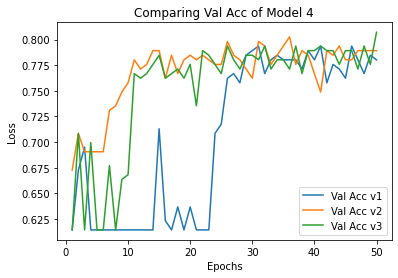

In [140]:
epochs = range(1,51)
plt.plot(epochs, history4.history['val_acc'], label = 'Val Acc v1')
plt.plot(epochs, history4_v2.history['val_acc'], label = 'Val Acc v2')
plt.plot(epochs, history4_v3.history['val_acc'], label = 'Val Acc v3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Val Acc of Model 4')
plt.legend()
#version 3 has best accuracy 

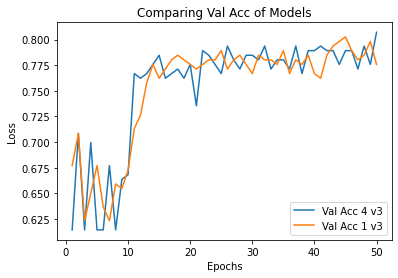

In [141]:
plt.plot(epochs, history4_v3.history['val_acc'], label = 'Val Acc 4 v3')
plt.plot(epochs, history1_v3.history['val_acc'], label = 'Val Acc 1 v3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparing Val Acc of Models')
plt.legend()
#Model 1 performs better than model 4 

In [143]:
prediction = model.predict(test_data)

In [146]:
prediction = np.round(prediction.reshape(418,)).astype('int64').tolist()

In [148]:
pred = pd.DataFrame( 
    {
        'PassengerId': passenger_id, 
        'Survived': prediction
    }
)

directory = os.getcwd() + "\\predictions_cnn_v2.csv"

pred.to_csv(path_or_buf = directory, index=False)

In [ ]:
#Surprisingly adding a dropout layer drops the accuracy to 73% 